# Perceptron


### Dataset

In [92]:
# And
x = [[1,1] , [1,-1] , [-1,1] , [-1,-1]]
y = [1 , -1 , -1 , -1]

In [98]:
# Or
x = [[1,1] , [1,-1] , [-1,1] , [-1,-1]]
y = [1 , 1 , 1 , -1]

In [104]:
# Xor
x = [[1,1] , [1,-1] , [-1,1] , [-1,-1]]
y = [-1 , 1 , 1 , -1]

### Vector Based

In [91]:
import numpy as np
import matplotlib.pyplot as plt

def perceptron(x , y , lr=0.1):
  x = np.hstack((np.array(x) , np.ones((len(x),1))))
  w = x[0]

  while True:
    isChange = False
    for i,u in enumerate(x):
      if y[i] * np.dot(w , u) <= 0:
        w += lr*u*y[i]
        isChange = True
        break
    if isChange == False :
      break
  return w

def plot_hyperplane(x,y,w):
  x = np.array(x)

  for i,u in enumerate(x):
    if y[i] == 1:
      plt.plot(u[0],u[1],'.g')
    else :
      plt.plot(u[0],u[1],'.r')

    slope = -w[0]/w[1]
    bias = -w[2]/w[1]
    X = np.array([i for i in range(-1,2,)])
    plt.plot(X , X*slope + bias , '-b')

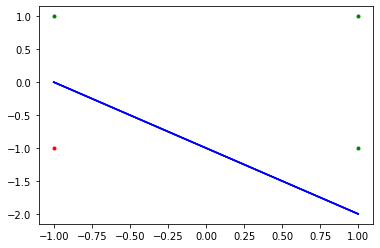

In [99]:
#Xor doesn't work.
w = perceptron(x,y)

plot_hyperplane(x,y,w)

### Gradient Based

In [108]:
import tensorflow as tf
import numpy as np

model = tf.keras.Sequential()
model.add(tf.keras.layers.Input((2,)))
model.add(tf.keras.layers.Dense(10 , activation='sigmoid'))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1) , 
              loss=tf.keras.losses.MeanSquaredError())

In [117]:
model.fit(x,y,epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 5ms/step - loss: 2.4747e-04
Epoch 2/10
1/1 [==============================] - 0s 4ms/step - loss: 1.3663e-04
Epoch 3/10
1/1 [==============================] - 0s 4ms/step - loss: 6.3175e-05
Epoch 4/10
1/1 [==============================] - 0s 4ms/step - loss: 2.2482e-05
Epoch 5/10
1/1 [==============================] - 0s 4ms/step - loss: 6.8747e-06
Epoch 6/10
1/1 [==============================] - 0s 4ms/step - loss: 1.1550e-05
Epoch 7/10
1/1 [==============================] - 0s 7ms/step - loss: 3.3577e-05
Epoch 8/10
1/1 [==============================] - 0s 5ms/step - loss: 6.7415e-05
Epoch 9/10
1/1 [==============================] - 0s 4ms/step - loss: 1.0377e-04
Epoch 10/10
1/1 [==============================] - 0s 4ms/step - loss: 1.3354e-04


In [116]:
#Check Answer
np.round(model.predict(x)).reshape(4) == y

array([ True,  True,  True,  True])